In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import names
import random
from nltk.classify import apply_features
nltk.download('names')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


True

In [3]:
Gender_names = ([(name, 1.0) for name in names.words('male.txt')] + \
[(name, 0.0 ) for name in names.words('female.txt')])
random.seed(21)
random.shuffle(Gender_names)
print(Gender_names)

[('Dorette', 0.0), ('Michaelina', 0.0), ('Derrol', 1.0), ('Rozella', 0.0), ('Van', 1.0), ('Amaleta', 0.0), ('Ephram', 1.0), ('Allis', 0.0), ('Arden', 0.0), ('Jana', 0.0), ('Arlee', 0.0), ('Flo', 0.0), ('Adair', 1.0), ('Emilio', 1.0), ('Woody', 1.0), ('Lemar', 1.0), ('Philly', 0.0), ('Bertie', 0.0), ('Raquel', 0.0), ('Danie', 1.0), ('Jilleen', 0.0), ('Ashli', 0.0), ('Fan', 0.0), ('Tharen', 1.0), ('Richard', 1.0), ('Jess', 1.0), ('Joya', 0.0), ('Yonina', 0.0), ('Endora', 0.0), ('Bing', 1.0), ('Madelin', 0.0), ('Amata', 0.0), ('Sumner', 1.0), ('Tito', 1.0), ('Beverlie', 0.0), ('Roger', 1.0), ('Pippy', 0.0), ('Les', 1.0), ('Hersch', 1.0), ('Adelle', 0.0), ('JoAnne', 0.0), ('Duffie', 1.0), ('Emilia', 0.0), ('Trula', 0.0), ('Lizabeth', 0.0), ('Clare', 1.0), ('Lanita', 0.0), ('Yoko', 0.0), ('Johnathan', 1.0), ('Welch', 1.0), ('Thia', 0.0), ('Sarine', 0.0), ('Felicle', 0.0), ('Joyan', 0.0), ('Nicolle', 0.0), ('Mirilla', 0.0), ('Colleen', 0.0), ('Ashleigh', 0.0), ('Ev', 1.0), ('Anitra', 0.0), (

In [4]:

Gender_names[0:10] #show the names with gender. 
len(Gender_names)
Gender_names_g= [g for (n,g) in Gender_names]
Gender_names_m = Gender_names_g.count(1.0)# male=1.0
Gender_names_f = Gender_names_g.count(0.0)#female=0.0
print("Total Male: {} and Female: {} in dataset of size: {}.".format(Gender_names_m,Gender_names_f,len(Gender_names_g)))

Total Male: 2943 and Female: 5001 in dataset of size: 7944.


In [5]:
names_df = pd.DataFrame(Gender_names, columns=['name','gender'])
names_df.head()

,name,gender
0,Dorette,0.0
1,Michaelina,0.0
2,Derrol,1.0
3,Rozella,0.0
4,Van,1.0


# **Visualize Data**

In [6]:
distribution = nltk.ConditionalFreqDist([(file, word[0]) for file in ['female.txt', 'male.txt'] for word in nltk.corpus.names.words(file)])
distribution.tabulate() 

             A   B   C   D   E   F   G   H   I   J   K   L   M   N   O   P   Q   R   S   T   U   V   W   X   Y   Z 
female.txt 443 246 469 308 251 144 213 124  83 293 276 332 484 158  66 121   9 247 309 198  14 105  54   5  18  31 
  male.txt 213 173 166 146 119  87 156 163  45 144  70 113 200  77  52 101  15 200 238 188  22  50 151   7  16  31 


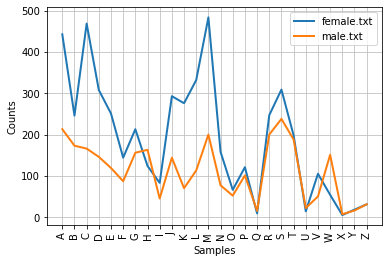

In [7]:
distribution.plot()

# **Data Preprocessing**

In [8]:
def preprocess(names_df, train=True):
    # Step 1: Lowercase
    names_df['name'] = names_df['name'].str.lower()

    # Step 2: Split individual characters
    names_df['name'] = [list(name) for name in names_df['name']]

    # Step 3: Pad names with spaces to make all names same length
    name_length = 50
    names_df['name'] = [
        (name + [' ']*name_length)[:name_length] 
        for name in names_df['name']
    ]

    # Step 4: Encode Characters to Numbers
    names_df['name'] = [
        [
            max(0.0, ord(char)-96.0) 
            for char in name
        ]
        for name in names_df['name']
    ]
    
    if train:
        # Step 5: Encode Gender to Numbers
        names_df['gender'] = [
            0.0 if gender=='female' else 1.0 
            for gender in names_df['gender']
        ]
    
    return names_df

names_df = preprocess(names_df)
names_df.head()

,name,gender
0,"[4.0, 15.0, 18.0, 5.0, 20.0, 20.0, 5.0, 0.0, 0...",1.0
1,"[13.0, 9.0, 3.0, 8.0, 1.0, 5.0, 12.0, 9.0, 14....",1.0
2,"[4.0, 5.0, 18.0, 18.0, 15.0, 12.0, 0.0, 0.0, 0...",1.0
3,"[18.0, 15.0, 26.0, 5.0, 12.0, 12.0, 1.0, 0.0, ...",1.0
4,"[22.0, 1.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",1.0


# **TASK 1**

In [9]:
## First we need to convert strings to letters
labeled_data1 = [(list(X.lower()),y) for (X,y) in Gender_names]
print(labeled_data1[27])

(['y', 'o', 'n', 'i', 'n', 'a'], 0.0)


In [10]:
names = []
labels = []

names = [vname for vname,x  in labeled_data1]
labels = [label for x , label in labeled_data1]
    
print(names[10:15])
print(labels[10:15])
len(names), len(labels)


[['a', 'r', 'l', 'e', 'e'], ['f', 'l', 'o'], ['a', 'd', 'a', 'i', 'r'], ['e', 'm', 'i', 'l', 'i', 'o'], ['w', 'o', 'o', 'd', 'y']]
[0.0, 0.0, 1.0, 1.0, 1.0]


(7944, 7944)

In [11]:
chars = ''
for name in names:
    for s in name:
        chars += s
charsu = set(chars)
print(charsu)
vocab_size = len(charsu)
print('total chars:', len(charsu))
char_indices = dict((c, i) for i, c in enumerate(charsu))
indices_char = dict((i, c) for i, c in enumerate(charsu))


{'n', '-', 'f', 'r', 'b', 'u', 'q', "'", 'd', 'x', 'a', ' ', 'h', 'l', 'w', 's', 'j', 'v', 'y', 'p', 'g', 'e', 'c', 'i', 'o', 'k', 'm', 't', 'z'}
total chars: 29


In [12]:
def vectorize_names(names, verbose=False):
    vnames =[]
    for name in names:
        x = [char_indices[c] for c in name]
        if verbose:
            print(x)
        vx = np.eye(len(char_indices))[x]
        if verbose:
            print(vx[0:12])
        vnames.append(vx)
    return vnames

vectorize_names(names[0:2], verbose=True)

vnames = vectorize_names(names,verbose=False)


[8, 24, 3, 21, 27, 27, 21]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0.]]
[26, 23, 22, 12, 10, 21, 13, 23, 0, 10]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0

In [13]:
from keras.preprocessing.sequence import pad_sequences

maxlen =20

pvnames =  pad_sequences(vnames, maxlen=maxlen)

print(len(pvnames[1]))

pvnames[1]

20


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
# Our vectorized training data
x_train = pvnames[1000:]
# Our vectorized test data
x_test = pvnames[:1000]

print(x_train.shape)

(6944, 20, 29)


In [15]:

import tensorflow as tf
from keras.utils.np_utils import to_categorical

In [16]:
y_ = to_categorical(labels)  # y: class vector to be converted into a matrix (integers from 0 to num_classes). 
print('y_.shape: ',y_.shape )  
print(y_[5:26])

y_.shape:  (7944, 2)
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [17]:
y_train = y_[1000:]
y_test = y_[:1000]
y_train.shape

(6944, 2)

In [18]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.layers import Conv1D

In [19]:
print(x_train.shape)

(6944, 20, 29)


In [20]:
nb_filter = 6
dense_outputs = 10
kernel_sizes = [2, 5, 3, 3, 4, 3]
n_out = 2
batch_size = 80
nb_epochs = 50

inputs = Input(shape=(20, 29), name='input', dtype='float32')

print('inputs.shape: ',inputs.shape)

inputs.shape:  (None, 20, 29)


In [21]:
conv = Conv1D(filters=nb_filter, kernel_size=kernel_sizes[0],
                     padding='same', activation='sigmoid',
                     input_shape=(20, 29))(inputs)
conv1 = MaxPooling1D(pool_size=5)(conv)

conv2 = Conv1D(filters=nb_filter, kernel_size=kernel_sizes[2],
                      padding='same', activation='sigmoid')(conv1)

conv5 = Flatten()(conv2)

z = Dropout(0.3)(Dense(dense_outputs, activation='sigmoid')(conv5))

pred = Dense(n_out, activation='softmax', name='output')(z)

model = Model(inputs=inputs, outputs=pred)

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

In [22]:
history=model.fit(x_train, y_train, batch_size=464,
           epochs=nb_epochs, validation_split=0.2, verbose=True)

Epoch 1/50
12/12 [==============================] - 2s 36ms/step - loss: 0.6949 - accuracy: 0.5577 - val_loss: 0.6607 - val_accuracy: 0.6343
Epoch 2/50
12/12 [==============================] - 0s 14ms/step - loss: 0.6842 - accuracy: 0.5685 - val_loss: 0.6579 - val_accuracy: 0.6343
Epoch 3/50
12/12 [==============================] - 0s 14ms/step - loss: 0.6805 - accuracy: 0.5872 - val_loss: 0.6572 - val_accuracy: 0.6343
Epoch 4/50
12/12 [==============================] - 0s 14ms/step - loss: 0.6759 - accuracy: 0.5993 - val_loss: 0.6570 - val_accuracy: 0.6343
Epoch 5/50
12/12 [==============================] - 0s 13ms/step - loss: 0.6684 - accuracy: 0.6074 - val_loss: 0.6567 - val_accuracy: 0.6343
Epoch 6/50
12/12 [==============================] - 0s 14ms/step - loss: 0.6682 - accuracy: 0.6176 - val_loss: 0.6575 - val_accuracy: 0.6343
Epoch 7/50
12/12 [==============================] - 0s 16ms/step - loss: 0.6700 - accuracy: 0.6074 - val_loss: 0.6568 - val_accuracy: 0.6343
Epoch 8/50
12

In [23]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [24]:
val_acc = history.history['val_accuracy']
acc=history.history['accuracy']
print(val_acc)
print(acc)

[0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105]

In [25]:
predictions = model.predict(x_test) 
predictions

array([[0.6276188 , 0.3723813 ],
       [0.62740755, 0.37259248],
       [0.62226504, 0.37773493],
       ...,
       [0.62650716, 0.37349275],
       [0.62343067, 0.37656936],
       [0.6230379 , 0.3769621 ]], dtype=float32)

In [26]:
score = model.evaluate(x_test,y_test) 
score

32/32 [==============================] - 0s 6ms/step - loss: 0.6550 - accuracy: 0.6350


[0.6550462245941162, 0.6349999904632568]

In [65]:
#  Save the model
model.save('maleorfemale.h5')

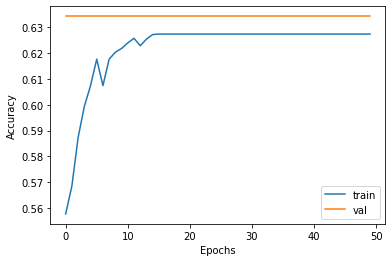

In [28]:
#Plot accuracies
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [66]:
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np

pred_model = load_model('maleorfemale.h5')

# Input names
names = ['Chris', 'Edna', 'Guenevere', 'Fonsie']

# Convert to dataframe
pred_df = pd.DataFrame({'name': names})

# Preprocess
pred_df = preprocess(pred_df, train=False)

# Predictions
result = pred_model.predict(np.asarray(
    pred_df['name'].values.tolist())).squeeze(axis=1)

pred_df['Male or Female?'] = [
    'Male' if logit > 0.5 else 'Female' for logit in result
]

pred_df['Probability'] = [
    logit if logit > 0.5 else 1.0 - logit for logit in result
]

# Format the output
pred_df['name'] = names
pred_df.rename(columns={'name': 'Name'}, inplace=True)
pred_df['Probability'] = pred_df['Probability'].round(2)
pred_df.drop_duplicates(inplace=True)

pred_df.head()

,Name,Male or Female?,Probability
0,Chris,Male,1.0
1,Edna,Male,1.0
2,Guenevere,Male,1.0
3,Fonsie,Male,1.0


In [29]:
names = ['Chris', 'Edna']
for name in names:
  for i in range(0,1):
    if predictions[i, 1] >= 0.5:
     print(name,'male') 
    else:
      print(name,'female')

Chris female
Edna female


# **TASK 2**

# **Model Architecture**

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam

def lstm_model(num_alphabets=27, name_length=50, embedding_dim=256):
    model = Sequential([
        Embedding(num_alphabets, embedding_dim, input_length=name_length),
        Bidirectional(LSTM(units=32, recurrent_dropout=0.2, dropout=0.2)),# by default units=128
        Dense(1, activation="sigmoid")
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

# **Training the Model**

Epoch 1/50
100/100 [==============================] - 32s 259ms/step - loss: 0.6213 - accuracy: 0.6573 - val_loss: 0.5382 - val_accuracy: 0.7256
Epoch 2/50
100/100 [==============================] - 26s 257ms/step - loss: 0.5156 - accuracy: 0.7482 - val_loss: 0.4659 - val_accuracy: 0.7904
Epoch 3/50
100/100 [==============================] - 25s 251ms/step - loss: 0.4812 - accuracy: 0.7734 - val_loss: 0.4577 - val_accuracy: 0.7974
Epoch 4/50
100/100 [==============================] - 25s 252ms/step - loss: 0.4717 - accuracy: 0.7791 - val_loss: 0.4612 - val_accuracy: 0.7829
Epoch 5/50
100/100 [==============================] - 25s 250ms/step - loss: 0.4592 - accuracy: 0.7854 - val_loss: 0.4323 - val_accuracy: 0.8049
Epoch 6/50
100/100 [==============================] - 25s 254ms/step - loss: 0.4462 - accuracy: 0.7893 - val_loss: 0.4145 - val_accuracy: 0.8200
Epoch 7/50
100/100 [==============================] - 25s 253ms/step - loss: 0.4369 - accuracy: 0.7948 - val_loss: 0.4276 - val_ac

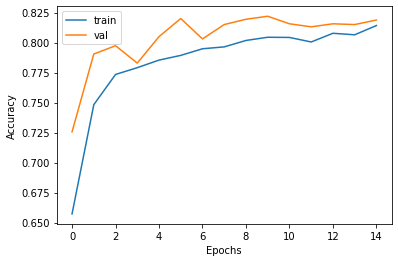

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Instantiate the model
model = lstm_model(num_alphabets=27, name_length=50, embedding_dim=256)

# Step 2: Split Training and Test Data
X = np.asarray(names_df['name'].values.tolist())
y = np.asarray(names_df['gender'].values.tolist())

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

# Step 3: Train the model
callbacks = [
    EarlyStopping(monitor='val_accuracy',
                  min_delta=1e-3,
                  patience=5,
                  mode='max',
                  restore_best_weights=True,
                  verbose=1),
]

history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=64,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=callbacks)

# Step 4: Save the model
model.save('maleorfemale.h5')

# Step 5: Plot accuracies
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [63]:

from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np

pred_model = load_model('maleorfemale.h5')

# Input names
names = ['Chris', 'Edna', 'Guenevere', 'Fonsie']

# Convert to dataframe
pred_df = pd.DataFrame({'name': names})

# Preprocess
pred_df = preprocess(pred_df, train=False)

# Predictions
result = pred_model.predict(np.asarray(
    pred_df['name'].values.tolist())).squeeze(axis=1)

pred_df['Male or Female?'] = [
    'Male' if logit > 0.5 else 'Female' for logit in result
]

pred_df['Probability'] = [
    logit if logit > 0.5 else 1.0 - logit for logit in result
]

# Format the output
pred_df['name'] = names
pred_df.rename(columns={'name': 'Name'}, inplace=True)
pred_df['Probability'] = pred_df['Probability'].round(2)
pred_df.drop_duplicates(inplace=True)

pred_df.head()

,Name,Male or Female?,Probability
0,Chris,Male,1.0
1,Edna,Male,1.0
2,Guenevere,Male,1.0
3,Fonsie,Male,1.0


# **TASK-3**

In [55]:
conv = Conv1D(filters=nb_filter, kernel_size=kernel_sizes[0],
                     padding='same', activation='sigmoid',
                     input_shape=(20, 29))(inputs)
conv1 = MaxPooling1D(pool_size=5)(conv)

conv2 = Conv1D(filters=nb_filter, kernel_size=kernel_sizes[2],
                      padding='same', activation='sigmoid')(conv1)

#conv5 = Flatten()(conv2)

z = Dropout(0.3)(Dense(dense_outputs, activation='sigmoid')(conv2))

y = LSTM(units=32, recurrent_dropout=0.2, dropout=0.2)(z)# by default units=128


x = Dropout(0.2)(Dense(dense_outputs, activation='sigmoid')(y))

pred = Dense(n_out, activation='softmax', name='output')(x)

model = Model(inputs=inputs, outputs=pred)

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

In [43]:
x_train.shape

(6944, 20, 29)

In [44]:
y_train.shape

(6355,)

In [46]:
y_train = to_categorical(labels)  
print('y_.shape: ',y_.shape )  
#print(y_[5:26])

y_.shape:  (7944, 2)


In [56]:
history=model.fit(x_train, y_train, batch_size=464,
           epochs=nb_epochs, validation_split=0.2, verbose=True)

Epoch 1/50
12/12 [==============================] - 5s 75ms/step - loss: 0.6811 - accuracy: 0.5951 - val_loss: 0.6602 - val_accuracy: 0.6278
Epoch 2/50
12/12 [==============================] - 0s 29ms/step - loss: 0.6742 - accuracy: 0.6079 - val_loss: 0.6601 - val_accuracy: 0.6278
Epoch 3/50
12/12 [==============================] - 0s 25ms/step - loss: 0.6727 - accuracy: 0.6063 - val_loss: 0.6601 - val_accuracy: 0.6278
Epoch 4/50
12/12 [==============================] - 0s 26ms/step - loss: 0.6709 - accuracy: 0.6144 - val_loss: 0.6602 - val_accuracy: 0.6278
Epoch 5/50
12/12 [==============================] - 0s 25ms/step - loss: 0.6688 - accuracy: 0.6162 - val_loss: 0.6601 - val_accuracy: 0.6278
Epoch 6/50
12/12 [==============================] - 0s 28ms/step - loss: 0.6684 - accuracy: 0.6189 - val_loss: 0.6601 - val_accuracy: 0.6278
Epoch 7/50
12/12 [==============================] - 0s 30ms/step - loss: 0.6647 - accuracy: 0.6229 - val_loss: 0.6601 - val_accuracy: 0.6278
Epoch 8/50
12

Epoch 1/50
100/100 [==============================] - 38s 316ms/step - loss: 0.0569 - accuracy: 0.9991 - val_loss: 2.9675e-04 - val_accuracy: 1.0000
Epoch 2/50
100/100 [==============================] - 27s 273ms/step - loss: 2.0994e-04 - accuracy: 1.0000 - val_loss: 1.3555e-04 - val_accuracy: 1.0000
Epoch 3/50
100/100 [==============================] - 27s 272ms/step - loss: 1.1386e-04 - accuracy: 1.0000 - val_loss: 8.5442e-05 - val_accuracy: 1.0000
Epoch 4/50
100/100 [==============================] - 27s 270ms/step - loss: 7.6514e-05 - accuracy: 1.0000 - val_loss: 6.1301e-05 - val_accuracy: 1.0000
Epoch 5/50
100/100 [==============================] - 27s 268ms/step - loss: 5.6986e-05 - accuracy: 1.0000 - val_loss: 4.7059e-05 - val_accuracy: 1.0000
Epoch 6/50
100/100 [==============================] - 27s 273ms/step - loss: 4.4833e-05 - accuracy: 1.0000 - val_loss: 3.7679e-05 - val_accuracy: 1.0000
Epoch 6: early stopping


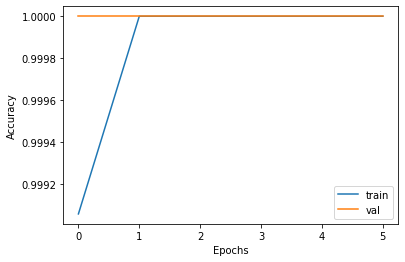

In [57]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Instantiate the model
model = lstm_model(num_alphabets=27, name_length=50, embedding_dim=256)

# Step 2: Split Training and Test Data
X = np.asarray(names_df['name'].values.tolist())
y = np.asarray(names_df['gender'].values.tolist())

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

# Step 3: Train the model
callbacks = [
    EarlyStopping(monitor='val_accuracy',
                  min_delta=1e-3,
                  patience=5,
                  mode='max',
                  restore_best_weights=True,
                  verbose=1),
]

history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=64,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=callbacks)

# Step 4: Save the model
model.save('maleorfemale.h5')

# Step 5: Plot accuracies
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [58]:
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np

pred_model = load_model('maleorfemale.h5')

# Input names
names = ['Chris', 'Edna', 'Guenevere', 'Fonsie']

# Convert to dataframe
pred_df = pd.DataFrame({'name': names})

# Preprocess
pred_df = preprocess(pred_df, train=False)

# Predictions
result = pred_model.predict(np.asarray(
    pred_df['name'].values.tolist())).squeeze(axis=1)

pred_df['Male or Female?'] = [
    'Male' if logit > 0.5 else 'Female' for logit in result
]

pred_df['Probability'] = [
    logit if logit > 0.5 else 1.0 - logit for logit in result
]

# Format the output
pred_df['name'] = names
pred_df.rename(columns={'name': 'Name'}, inplace=True)
pred_df['Probability'] = pred_df['Probability'].round(2)
pred_df.drop_duplicates(inplace=True)

pred_df.head()

,Name,Male or Female?,Probability
0,Chris,Male,1.0
1,Edna,Male,1.0
2,Guenevere,Male,1.0
3,Fonsie,Male,1.0
